# 1. Import CSV

In [83]:
import pandas as pd

df = pd.read_csv('annote_yidi.csv')


print(df)


    GOLD EI NS FT PJ                                           vacances  \
0   INFP  I  N  F  P  J'aime beaucoup voyager (que cela soit en Fran...   
1   ENFP  E  N  F  P  Je préfère les voyages de vacances non planifi...   
2   INTJ  I  N  T  P  aller dans des endroits / lieux visuellement b...   
3   INFJ  E  N  F  P  Partir dans un endroit que je ne connais pas, ...   
4   INTP  I  N  T  P  Mon type de vacances préféré est lorsque je re...   
..   ... .. .. .. ..                                                ...   
60  ESTJ  E  S  T  J  Sortir avec des amis qui forment une équipe bi...   
61  ENFJ  I  N  F  P  J’aime bien trouver des lieux pas très populai...   
62  ISTP  E  S  F  P  J’aime bien les vacances chills. J’aime bien a...   
63  ISTJ  I  S  T  J  Si j'ai plus ou moins un mois pour les vacance...   
64  INFP  I  N  F  P  Partir en vacances avec quelques amis, dans un...   

                                          Passe-temps  
0   J'aime beaucoup écrire, apprendre des l

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

def count_and_plot_pie_charts_with_tables(csv_filename, column_number):
    df = pd.read_csv(csv_filename)

    col_name = df.columns[column_number]

    df[f'{col_name}_1'] = df[col_name].str[0]
    df[f'{col_name}_2'] = df[col_name].str[1]
    df[f'{col_name}_3'] = df[col_name].str[2]
    df[f'{col_name}_4'] = df[col_name].str[3]

    for i in range(1, 5):
        part_name = f'{col_name}_{i}'
        value_counts = df[part_name].value_counts()

        clear_yellow = '#FFFF66'
        clear_blue = '#66B3FF'
        colors = [clear_yellow, clear_blue]

        fig, ax = plt.subplots(figsize=(6, 6))
        ax.pie(value_counts, labels=value_counts.index, autopct='%1.1f%%', startangle=140, colors=colors,
                textprops={'fontsize': 14})  

        values = ', '.join(value_counts.index[:2]) 
        ax.set_title(f"Repartition de {values} dans le corpus", fontsize=16)

        table_data = [(value, count) for value, count in zip(value_counts.index, value_counts)]
        table = plt.table(cellText=table_data, cellLoc='center', loc='bottom', colLabels=['Catégorie', 'Fréquence'])
        table.auto_set_font_size(False)
        table.set_fontsize(10)
        table.scale(1, 1.2)

        plt.subplots_adjust(top=0.8) 

        plt.show()

count_and_plot_pie_charts_with_tables('annote_yidi.csv', 0)


# 3. Accuracy

In [101]:
import pandas as pd
def accuracy_ei_ponderer(csv_filename):
    
    I=38
    E=27


    df = pd.read_csv(csv_filename)

    e_correct_annotations = 0
    i_correct_annotations = 0

    for index, row in df.iterrows():
        GOLD = row['GOLD']
        test = row['EI']

        if 'E' in GOLD and 'E' in test:
            e_correct_annotations += 1
        elif 'I' in test and 'I' in GOLD:
            i_correct_annotations +=1


        e_accuracy = (e_correct_annotations / E) * 100
        i_accuracy= (i_correct_annotations/I)*100

        EI_ac_pond = (e_accuracy*E+i_accuracy*I)/(E+I)
    return EI_ac_pond

def accuracy_NS_ponderer(csv_filename):
    
    N=51
    S=14


    df = pd.read_csv(csv_filename)

    N_correct_annotations = 0
    S_correct_annotations = 0

    for index, row in df.iterrows():
        GOLD = row['GOLD']
        test = row['NS']

        if 'N' in GOLD and 'N' in test:
            N_correct_annotations += 1
        elif 'S' in test and 'S' in GOLD:
            S_correct_annotations +=1


        S_accuracy = (S_correct_annotations / S) * 100
        N_accuracy= (N_correct_annotations/N)*100

        NS_ac_pond = (S_accuracy*S+N_accuracy*N)/(N+S)
    return NS_ac_pond

def accuracy_PJ_ponderer(csv_filename):
    
    P=32
    J=33


    df = pd.read_csv(csv_filename)

    P_correct_annotations = 0
    J_correct_annotations = 0

    for index, row in df.iterrows():
        GOLD = row['GOLD']
        test = row['PJ']

        if 'P' in GOLD and 'P' in test:
            P_correct_annotations += 1
        elif 'J' in test and 'J' in GOLD:
            J_correct_annotations +=1


        P_accuracy = (P_correct_annotations / P) * 100
        J_accuracy= (J_correct_annotations/J)*100

        PJ_ac_pond = (P_accuracy*P+J_accuracy*J)/(P+J)
    return PJ_ac_pond

def accuracy_FT_ponderer(csv_filename):
    
    F=43
    T=22


    df = pd.read_csv(csv_filename)

    F_correct_annotations = 0
    T_correct_annotations = 0

    for index, row in df.iterrows():
        GOLD = row['GOLD']
        test = row['FT']

        if 'F' in GOLD and 'F' in test:
            F_correct_annotations += 1
        elif 'T' in test and 'T' in GOLD:
            T_correct_annotations +=1


        F_accuracy = (F_correct_annotations / F) * 100
        T_accuracy= (T_correct_annotations/T)*100

        FT_ac_pond = (F_accuracy*F+T_accuracy*T)/(T+F)
    return FT_ac_pond


In [106]:
EI1=accuracy_ei_ponderer('annote_yidi.csv')
EI2=accuracy_ei_ponderer('annote_kexin.csv')
NS2=accuracy_NS_ponderer('annote_kexin.csv')
NS1=accuracy_NS_ponderer('annote_yidi.csv')
FT1=accuracy_FT_ponderer('annote_yidi.csv')
FT2=accuracy_FT_ponderer('annote_kexin.csv')
PJ1=accuracy_PJ_ponderer('annote_yidi.csv')
PJ2=accuracy_PJ_ponderer('annote_kexin.csv')



print(EI1,EI2,NS1,NS2)
print(FT1,FT2,PJ1,PJ2)

81.53846153846153 76.92307692307692 86.15384615384616 86.15384615384616
81.53846153846153 84.61538461538461 63.07692307692308 64.61538461538461


In [ ]:
import matplotlib.pyplot as plt
import numpy as np

# Sample data (replace with your actual values)
data = {
    'Category': ['EI', 'NS', 'FT', 'PJ'],
    'Annotatrice1': [EI1, NS1, FT1, PJ1],
    'Annotatrice2': [EI2, NS2, FT2, PJ2]
}

# Create a DataFrame from the data
df = pd.DataFrame(data)

# Set the x-axis labels
x_labels = df['Category']
x = np.arange(len(x_labels))  # X-axis values

# Set the data for plotting
width = 0.35  # Width of each bar

# Create subplots for each category
fig, ax = plt.subplots(figsize=(10, 6))  # Adjust the figure size (width, height)

# Define colors for each dataset (yellow and lighter blue)
colors = ['gold', 'lightsteelblue']

# Create bars for each category and dataset with different colors
for i, col in enumerate(['Annotatrice1', 'Annotatrice2']):
    values = df[col]
    bar_positions = x + i * width  # Adjust bar positions for each dataset
    ax.bar(bar_positions, values, width, label=col, color=colors[i])

    # Add value numbers slightly to the left within each column's bar
    for j, value in enumerate(values):
        text_x = bar_positions[j] + width / 2 - 0.2 # Adjust the x-coordinate to move slightly to the left
        ax.text(text_x, value, f'{value:.2f}', ha='center', va='bottom', fontsize=12)

# Adjust the x-ticks and labels
ax.set_xticks(x + width / 2)
ax.set_xticklabels(x_labels, fontsize=14)  # Increase the size of letters
ax.set_xlabel('Catégories', fontsize=14)  # Increase the size of the x-axis label
ax.set_ylabel('Accuracy', fontsize=14)  # Increase the size of the y-axis label

# Set the title and legend
ax.set_title('Accuracy pondéré par 2 annotatrices', fontsize=16)  # Increase the size of the title
ax.legend(fontsize=12)  # Increase the size of the legend

# Show the plot
plt.tight_layout()  # Ensure the plot fits within the figure size
plt.show()


# AIA

Probabilité d'accord (Po) : 0.8
Probabilité d'accord simultané (Pe) : 0.6698224852071006
kappa : 0.39426523297491045


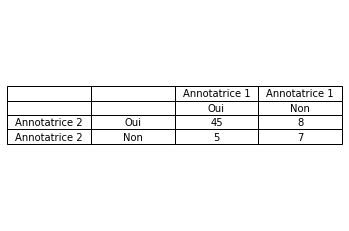

In [155]:
def AIA(test_colone):
    df1 = pd.read_csv('annote_yidi.csv')
    df2 = pd.read_csv('annote_kexin.csv')

    A,B,C,D=0,0,0,0
    for index, row1 in df1.iterrows():
        GOLD = row1['GOLD']
        test1 = row1[test_colone]

        row2 = df2.iloc[index] 
        test2 = row2[test_colone]

        if test1 in GOLD and test2 in GOLD :
            A+=1
        elif test1 in GOLD and test2 not in GOLD:
            B+=1
        elif test1 not in GOLD and test2 in GOLD :
            C+=1
        elif test1 not in GOLD and test2 not in GOLD :
            D+=1
    Po=(A+D)/(A+B+C+D)
    Oui= (A+C)/(A+B+C+D)*(A+B)/(A+B+C+D)
    Non=(B+D)/(A+B+C+D)*(C+D)/(A+B+C+D)
    Pe=Oui+Non
    Kappa = (Po-Pe)/(1-Pe)

    print(f"Probabilité d'accord (Po) : {Po}\nProbabilité d'accord simultané (Pe) : {Pe}\nkappa : {Kappa}")
    
    matrice = [['', '', 'Annotatrice 1', 'Annotatrice 1'],
           ['', '', 'Oui', 'Non',],
           ['Annotatrice 2', 'Oui', A, B],
           ['Annotatrice 2', 'Non', C, D]]

    fig, ax = plt.subplots()
    ax.axis('off')  # Masquez les axes

    # Créez un tableau pour afficher la matrice
    table = plt.table(cellText=matrice, cellLoc='center', loc='center')
    table.auto_set_font_size(False)
    table.set_fontsize(10)
    table.scale(1, 1.2)

    # Affichez le plot
    plt.show()




(AIA('EI'))    

Probabilité d'accord (Po) : 0.8153846153846154
Probabilité d'accord simultané (Pe) : 0.7614201183431953
kappa : 0.22619047619047591


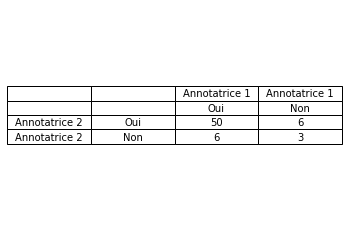

Probabilité d'accord (Po) : 0.7538461538461538
Probabilité d'accord simultané (Pe) : 0.7183431952662722
kappa : 0.12605042016806708


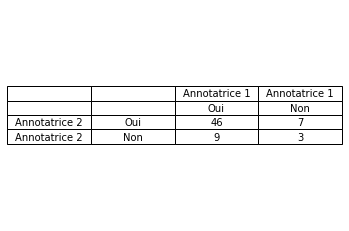

Probabilité d'accord (Po) : 0.6615384615384615
Probabilité d'accord simultané (Pe) : 0.5342011834319527
kappa : 0.27337398373983735


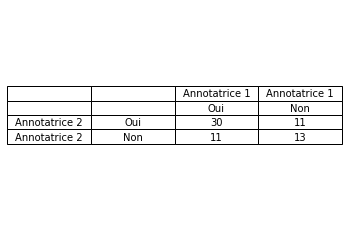

In [156]:
AIA('NS')
AIA('FT')
AIA('PJ')

# Preparation for train set

In [9]:
import pandas as pd
import os

df = pd.read_csv('annote_yidi.csv')

os.makedirs('J', exist_ok=True)
os.makedirs('P', exist_ok=True)

for index, row in df.iterrows():
    col_A = row['GOLD']
    col_F = row['vacances']
    col_G = row['passe-temps']

    if 'J' in col_A:

        target_directory = 'J' 

        file_name = f'{target_directory}/file-{index}.txt'  

        with open(file_name, 'w') as file:
            file.write(f'{col_F}\n{col_G}\n')
    if 'P'in col_A:

        target_directory = 'P' 

        file_name = f'{target_directory}/file-{index}.txt'  

        with open(file_name, 'w') as file:
            file.write(f'{col_F}\n{col_G}\n')
    


# Train test

In [36]:
import spacy

# Load the French language model
nlp = spacy.load("fr_core_news_md")


## Lemmatization

In [40]:
import os
import spacy

nlp = spacy.load("fr_core_news_md")

def lemmatize_text(text):
    doc = nlp(text)
    lemmatized_text = " ".join([token.lemma_ for token in doc])
    return lemmatized_text

input_directory = "MBTI_CATEGORIE/EI/I"

output_directory = "MBTI_CATEGORIE/EI/I_cleaned"

if not os.path.exists(output_directory):
    os.makedirs(output_directory)

for filename in os.listdir(input_directory):
    if filename.endswith(".txt"):
        input_path = os.path.join(input_directory, filename)
        output_path = os.path.join(output_directory, filename)

        with open(input_path, "r", encoding="utf-8") as input_file:
            text = input_file.read()
            lemmatized_text = lemmatize_text(text)

        with open(output_path, "w", encoding="utf-8") as output_file:
            output_file.write(lemmatized_text)

print("Lemmatization of text files completed.")


Lemmatization of text files completed.


## Stop words

In [46]:
import os
import re

def nettoyage_and_rewrite_directory(directory_path):
    # Load the list of stop words
    with open('stop-w_fr.txt', 'r', encoding='utf-8') as stop_words_file:
        stop_words = set(stop_words_file.read().splitlines())

    # Define a pattern to extract words (at least 2 characters) with accented characters
    pattern = r'[\wÀ-ÖØ-öø-ÿ]+'

    for root, dirs, files in os.walk(directory_path):
        for file in files:
            file_path = os.path.join(root, file)
            
            if file_path.endswith(".txt"):
                # Read the file and initialize the result string
                with open(file_path, 'r', encoding='utf-8') as input_file:
                    text = input_file.read()

                cleaned_text = ""

                # Tokenize the text and process each word
                for word in re.findall(pattern, text.lower()):
                    # Check if the word is not a stop word
                    if word not in stop_words:
                        cleaned_text += word + ' '

                # Write the cleaned text back to the same file
                with open(file_path, 'w', encoding='utf-8') as output_file:
                    output_file.write(cleaned_text)

# Example usage to clean and rewrite files in the 'E' directory
directory_path = 'MBTI_CATEGORIE/EI/I_cleaned'
nettoyage_and_rewrite_directory(directory_path)


In [52]:
import pandas as pd
import os

def create_csv_from_directory(directory_path, label, output_filename):
    data = []
    
    for root, dirs, files in os.walk(directory_path):
        for file in files:
            if file.endswith(".txt"):
                with open(os.path.join(root, file), 'r', encoding='utf-8') as input_file:
                    response = input_file.read().strip()
                data.append([response, label])
    
    df = pd.DataFrame(data, columns=["reponse", "label"])
    
    df.to_csv(output_filename, mode='a', index=False, header=True)

# Create separate CSV files for the 'EI' and 'I' directories
create_csv_from_directory("MBTI_CATEGORIE/EI/E_cleaned", 1, "output.csv")
create_csv_from_directory("MBTI_CATEGORIE/EI/I_cleaned", 0, "output.csv")


In [53]:
import pandas as pd
df = pd.read_csv('output.csv',encoding="utf-8")

In [54]:
df.head()

,reponse,label
0,rester maison aller chercher amie vacance long...,1
1,voyager semaine fatigant aimer peinture natati...,1
2,concerner vacance idéal voyager goal sortir dé...,1
3,vacance aimer peindre maison retrouver ami all...,1
4,aller pays grand histoire visiter ruine monume...,1


In [59]:
### split data to negatif and positif comment
I=df[df['label']==0]['reponse']
E=df[df['label']==1]['reponse']

In [60]:
from sklearn.feature_extraction.text import TfidfVectorizer
vectorizer = TfidfVectorizer(ngram_range=(2, 4))

In [62]:
X_I = vectorizer.fit_transform(I)
print(vectorizer.get_feature_names_out())

print(X_I.shape)


['100 pourcent' '100 pourcent moment' '100 pourcent moment pouvoir' ...
 'île couper' 'île couper monde' 'île couper monde abuser']
(38, 5611)


In [64]:
I=pd.DataFrame(X_I.toarray(),columns=vectorizer.get_feature_names_out())
I

,100 pourcent,100 pourcent moment,100 pourcent moment pouvoir,180 degré,180 degré pile,180 degré pile aimer,2016 commencer,2016 commencer photo,2016 commencer photo paysage,absorber émotion,...,évidemment accord art mode,évidemment organiser,évidemment organiser aimer,évidemment organiser aimer prêt,éviter gros,éviter gros situation,éviter gros situation embarras,île couper,île couper monde,île couper monde abuser
0,0.00000,0.00000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
1,0.00000,0.00000,0.00000,0.000000,0.000000,0.000000,0.063746,0.063746,0.063746,0.00000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
2,0.00000,0.00000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
3,0.00000,0.00000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
4,0.00000,0.00000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
5,0.00000,0.00000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
6,0.00000,0.00000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
7,0.00000,0.00000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
8,0.00000,0.00000,0.00000,0.066484,0.066484,0.066484,0.000000,0.000000,0.000000,0.00000,...,0.066484,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.066484,0.066484,0.066484
9,0.00000,0.00000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000


In [65]:
X_E = vectorizer.fit_transform(E)
print(vectorizer.get_feature_names_out())

print(X_E.shape)

['absolu tâche' 'absolu tâche supplémentaire'
 'absolu tâche supplémentaire besoin' ... 'éviter prendre'
 'éviter prendre habitude' 'éviter prendre habitude règle']
(27, 3196)


In [67]:
E=pd.DataFrame(X_E.toarray(),columns=vectorizer.get_feature_names_out())
E

,absolu tâche,absolu tâche supplémentaire,absolu tâche supplémentaire besoin,accompagner finir,accompagner finir vraiment,accompagner finir vraiment préférence,accomplissement terminer,accumuler solei,accumuler solei passer,accumuler solei passer temps,...,étudier jouer mahjong nager,étudier master,étudier master milieu,étudier master milieu astronomie,évacuer émotion,évacuer émotion négatif,évacuer émotion négatif tuer,éviter prendre,éviter prendre habitude,éviter prendre habitude règle
0,0.00000,0.00000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
1,0.00000,0.00000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
2,0.00000,0.00000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
3,0.00000,0.00000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
4,0.00000,0.00000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
5,0.00000,0.00000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
6,0.09197,0.09197,0.09197,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
7,0.00000,0.00000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.065419,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
8,0.00000,0.00000,0.00000,0.000000,0.000000,0.000000,0.000000,0.065673,0.065673,0.065673,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
9,0.00000,0.00000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000


In [68]:
E.max(axis=1)

0     0.168147
1     0.174994
2     0.126432
3     0.072288
4     0.088572
5     0.234082
6     0.163445
7     0.130838
8     0.131346
9     0.288675
10    0.110217
11    0.076023
12    0.169334
13    0.154303
14    0.087039
15    0.081052
16    0.113957
17    0.063969
18    0.085191
19    0.066843
20    0.146942
21    0.193204
22    0.149421
23    0.261217
24    0.179339
25    0.156677
26    0.143038
dtype: float64

In [70]:
### avec toutes les données
vectorizer = TfidfVectorizer(ngram_range=(1, 1))
X = vectorizer.fit_transform(df['reponse'])
print(vectorizer.get_feature_names_out())

print(X.shape)

['100' '180' '2016' ... 'évidemment' 'éviter' 'île']
(65, 1052)


In [72]:
Mat=pd.DataFrame(X.toarray(),columns=vectorizer.get_feature_names_out())
Mat

,100,180,2016,absolu,absorber,abuser,accablant,accompagner,accomplissement,accord,...,étonnant,étranger,étude,étudiant,étudier,évacuer,évader,évidemment,éviter,île
0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
60,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.000000,0.154563,0.0,0.0,0.0
61,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.0,0.0,0.0
62,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.0,0.0,0.0
63,0.0,0.0,0.0,0.0,0.0,0.0,0.174485,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.158751,0.000000,0.0,0.0,0.0


In [73]:
Mat.max(axis=1)

0     0.400110
1     0.393857
2     0.330807
3     0.537654
4     0.298251
        ...   
60    0.309125
61    0.326767
62    0.303414
63    0.232239
64    0.415062
Length: 65, dtype: float64

In [74]:
from sklearn.metrics.pairwise import cosine_similarity
res=pd.DataFrame(cosine_similarity(Mat,Mat))
res

,0,1,2,3,4,5,6,7,8,9,...,55,56,57,58,59,60,61,62,63,64
0,1.000000,0.055722,0.061308,0.151736,0.090113,0.0,0.038306,0.169686,0.081163,0.000000,...,0.061471,0.033982,0.107490,0.069167,0.052318,0.048959,0.125232,0.013524,0.025183,0.061612
1,0.055722,1.000000,0.124869,0.043087,0.050906,0.0,0.062268,0.083190,0.028933,0.000000,...,0.000000,0.071563,0.065256,0.070689,0.018610,0.130208,0.132995,0.100682,0.109824,0.063435
2,0.061308,0.124869,1.000000,0.062432,0.163460,0.0,0.038577,0.125520,0.082287,0.021789,...,0.028064,0.158158,0.055566,0.119296,0.082057,0.113736,0.093353,0.069306,0.095476,0.082901
3,0.151736,0.043087,0.062432,1.000000,0.079389,0.0,0.083894,0.145280,0.102471,0.000000,...,0.188384,0.097773,0.128251,0.125470,0.100208,0.047107,0.115364,0.042668,0.070952,0.179059
4,0.090113,0.050906,0.163460,0.079389,1.000000,0.0,0.080685,0.127886,0.075695,0.000000,...,0.034058,0.118466,0.086963,0.139671,0.161660,0.136073,0.089845,0.060020,0.043205,0.098467
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
60,0.048959,0.130208,0.113736,0.047107,0.136073,0.0,0.083003,0.209810,0.095572,0.000000,...,0.045478,0.132184,0.060048,0.184030,0.039931,1.000000,0.103666,0.079539,0.123846,0.109049
61,0.125232,0.132995,0.093353,0.115364,0.089845,0.0,0.090315,0.134860,0.106136,0.038312,...,0.113107,0.113652,0.140921,0.121900,0.128498,0.103666,1.000000,0.145314,0.074955,0.089316
62,0.013524,0.100682,0.069306,0.042668,0.060020,0.0,0.099758,0.069739,0.055191,0.000000,...,0.074355,0.100100,0.068330,0.065164,0.087358,0.079539,0.145314,1.000000,0.063821,0.097407
63,0.025183,0.109824,0.095476,0.070952,0.043205,0.0,0.078026,0.071711,0.086877,0.031446,...,0.029612,0.153009,0.056042,0.053601,0.053486,0.123846,0.074955,0.063821,1.000000,0.069253


# Word2vec

In [75]:
df.shape

(65, 2)

In [77]:
import nltk
list_sents = [nltk.word_tokenize(sent) for sent_tok in df['reponse'] for sent in nltk.sent_tokenize(sent_tok)]

In [78]:
list_sents

[['rester',
  'maison',
  'aller',
  'chercher',
  'amie',
  'vacance',
  'long',
  'vouloir',
  'voyager',
  'coucher',
  'jouer',
  'téléphone',
  'faire',
  'repas'],
 ['voyager',
  'semaine',
  'fatigant',
  'aimer',
  'peinture',
  'natation',
  'tennis',
  'pouvoir',
  'constamment',
  'penser',
  'améliorer',
  'faire',
  'chose'],
 ['concerner',
  'vacance',
  'idéal',
  'voyager',
  'goal',
  'sortir',
  'découvrir',
  'vraiment',
  'envie',
  'chill',
  'aimer',
  'randonnée',
  'aimer',
  'confort',
  'vraiment',
  'envie',
  'entourer',
  'rentrer',
  'chose',
  'aimer',
  'flemm',
  'voir',
  'ami',
  'devenir',
  'aigri',
  'saouler',
  'bout',
  'semaine',
  'maximum',
  'bouger',
  'aller',
  'obligatoire',
  'échec',
  'jeu',
  'stratégie',
  'social',
  'survivor',
  'the',
  'genius',
  'big',
  'brother',
  'internet',
  'aspect',
  'stratégique',
  'créer',
  'alliance',
  'adapter',
  'meilleur',
  'jeu',
  'aller',
  'loin',
  'vraiment',
  'passion',
  'moment',

In [79]:
import multiprocessing
cores = multiprocessing.cpu_count() # compte le nombre de cœurs (core) dans l'ordinateur pour l'entrainement

In [80]:
from gensim.models import Word2Vec
w2v_model = Word2Vec(sentences=list_sents, 
                          min_count=20,
                          window=2,
                          vector_size=300,
                          sample=6e-5, 
                          alpha=0.03, 
                          min_alpha=0.0007, 
                          negative=20,
                          workers=cores-1)

In [81]:
import time
tmps1=time.time()

w2v_model.build_vocab(list_sents, progress_per=10000)

print('Time to build vocab: {} mins'.format(round((time.time()-tmps1) / 60, 2)))

Time to build vocab: 0.0 mins


In [82]:
t = time.time()

w2v_model.train(list_sents, total_examples=w2v_model.corpus_count, epochs=30, report_delay=1)

print('Time to train the model: {} mins'.format(round((time.time() - t) / 60, 2)))

Time to train the model: 0.0 mins


In [83]:
w2v_model.init_sims(replace=True)

/tmp/ipykernel_284332/514372312.py:1: DeprecationWarning: Call to deprecated `init_sims` (Gensim 4.0.0 implemented internal optimizations that make calls to init_sims() unnecessary. init_sims() is now obsoleted and will be completely removed in future versions. See https://github.com/RaRe-Technologies/gensim/wiki/Migrating-from-Gensim-3.x-to-4).
  w2v_model.init_sims(replace=True)


In [84]:
### most similarity
w2v_model.wv.most_similar(positive=["lire"])

[('temps', 0.9403216242790222),
 ('aimer', 0.9398316144943237),
 ('faire', 0.9355983734130859),
 ('sortir', 0.9164833426475525),
 ('passer', 0.9158181548118591),
 ('vacance', 0.9131986498832703),
 ('pouvoir', 0.9102528095245361),
 ('ville', 0.9089371562004089),
 ('jeu', 0.9055252075195312),
 ('préférer', 0.8982329368591309)]

In [86]:
### similarity
w2v_model.wv.similarity("aimer", 'sortir')

0.9415112

In [87]:
### getting a word vector
w2v_model.wv['lire']

array([ 0.02734734,  0.05607159, -0.00452132, -0.0519398 , -0.03880252,
       -0.04137708, -0.01389813,  0.08450111, -0.0298214 , -0.03947932,
        0.0722303 , -0.07752286, -0.05243456,  0.07648866, -0.03143409,
       -0.12300751,  0.08207707,  0.00365424,  0.04885875,  0.03328267,
        0.00824235, -0.03901827,  0.04443308,  0.07201254, -0.06905432,
        0.0044558 , -0.09544493,  0.03466031,  0.0259263 , -0.07401481,
        0.02503769, -0.07637726,  0.09733559, -0.01005672, -0.00786869,
       -0.04271787, -0.00901848, -0.03664326, -0.03854025, -0.01010771,
       -0.06125522, -0.00468205,  0.05990508,  0.00465422, -0.04806579,
       -0.01989957,  0.03928366, -0.06471026, -0.04769653,  0.03632846,
       -0.00445657,  0.01730857, -0.05302852,  0.04126657,  0.04389473,
       -0.03203743,  0.02892423, -0.0460124 ,  0.06601848, -0.02534931,
       -0.00808703,  0.00108923, -0.0041942 ,  0.11394181, -0.01141077,
        0.04152643,  0.01628543,  0.06098156, -0.10531005,  0.07

In [88]:
import torch
from transformers import CamembertTokenizer,CamembertModel

tokenizer = CamembertTokenizer.from_pretrained('camembert/camembert-large')
model = CamembertModel.from_pretrained('camembert/camembert-large',output_hidden_states=True)

In [89]:
# Extract the last layer's features
line = "J'aime le camembert !"
input_ids = tokenizer.encode(line, return_tensors='pt') 
outputs = model(input_ids)

In [90]:
input_ids.shape

torch.Size([1, 10])

In [91]:
outputs[2][-4:]

(tensor([[[ 0.1587,  0.3786,  0.0825,  ...,  0.1899,  0.0925, -0.2983],
          [ 0.4463, -0.0386, -0.4613,  ...,  0.3045, -0.0562, -0.3966],
          [ 0.0162,  0.4548,  0.4028,  ...,  0.3415,  0.1764, -0.1404],
          ...,
          [ 0.3938,  0.3159, -0.2385,  ...,  0.3451,  0.3870,  0.3684],
          [ 0.1471,  0.0064,  0.3660,  ...,  0.2415, -0.3712,  0.0727],
          [-0.0252, -0.0246,  0.0434,  ...,  0.0147, -0.0142, -0.0358]]],
        grad_fn=<NativeLayerNormBackward0>),
 tensor([[[-0.0578,  0.4780,  0.3756,  ...,  0.2118,  0.1431,  0.1120],
          [ 0.2987, -0.2125, -0.5713,  ...,  0.2652, -0.0030, -0.1967],
          [ 0.3370,  0.4695,  0.3492,  ...,  0.1969,  0.0118, -0.1037],
          ...,
          [ 0.3618,  0.3188, -0.2318,  ...,  0.1946,  0.2531,  0.4184],
          [ 0.2292, -0.0217,  0.1935,  ...,  0.1682, -0.2649,  0.2151],
          [-0.0282, -0.0402,  0.0247,  ...,  0.0333,  0.0277, -0.0330]]],
        grad_fn=<NativeLayerNormBackward0>),
 tensor([[[-

In [92]:
import pandas as pd
import numpy as np

l=[]
for i in range(-1,-5,-1):
    l.append(pd.DataFrame(np.mean(outputs[2][i].squeeze(0).detach().numpy(),axis=0)).T)
    
pd.concat(l,ignore_index=True).mean(axis=0)

0       0.078970
1       0.036869
2       0.041912
3       0.090438
4       0.144143
          ...   
1019   -0.028084
1020    0.049764
1021    0.029793
1022    0.010036
1023    0.017181
Length: 1024, dtype: float32

# PARTIE 3

In [93]:
import pandas as pd
df = pd.read_csv('output.csv',encoding="utf-8")

In [94]:
from sklearn.model_selection import train_test_split

reviews = df['reponse']
labels = df['label']

X_train, X_test, y_train, y_test = train_test_split(reviews, labels, random_state = 42, test_size = 0.3)

In [95]:
from sklearn.feature_extraction.text import TfidfVectorizer

vectorizer = TfidfVectorizer()
X_train_final = vectorizer.fit_transform(X_train)

print(X_train_final.shape)

(45, 852)


In [99]:
from sklearn.pipeline import Pipeline
from sklearn.svm import LinearSVC

text_clf = Pipeline([('tfidf', TfidfVectorizer()),('clf', LinearSVC()),])
text_clf.fit(X_train, y_train)

/home/yidi/.local/lib/python3.10/site-packages/sklearn/svm/_classes.py:32: FutureWarning: The default value of `dual` will change from `True` to `'auto'` in 1.5. Set the value of `dual` explicitly to suppress the warning.
  warnings.warn(


Pipeline(steps=[('tfidf', TfidfVectorizer()), ('clf', LinearSVC())])

In [100]:
tfid_predictions = text_clf.predict(X_test)

In [101]:
text_clf.score(X_test, y_test)

0.5

## Word2vec

In [102]:
import nltk
list_sents = [nltk.word_tokenize(sent) for sent_tok in X_train for sent in nltk.sent_tokenize(sent_tok)]

In [103]:
from gensim.models import Word2Vec
w2v_model = Word2Vec(sentences=list_sents, 
                          min_count=20,
                          window=12,
                          vector_size=80,
                          sample=6e-5, 
                          alpha=0.03, 
                          min_alpha=0.0007, 
                          negative=20,
                          workers=8)

In [104]:
w2v_model.corpus_count

45

In [105]:
import time
tmps1=time.time()

w2v_model.build_vocab(list_sents, progress_per=10000)

print('Time to build vocab: {} mins'.format(round((time.time()-tmps1) / 60, 2)))

Time to build vocab: 0.0 mins


In [106]:
t = time.time()

w2v_model.train(list_sents, total_examples=w2v_model.corpus_count, epochs=30, report_delay=1)

print('Time to train the model: {} mins'.format(round((time.time() - t) / 60, 2)))

Time to train the model: 0.0 mins


In [107]:
w2v_model.init_sims(replace=True)

/tmp/ipykernel_284332/514372312.py:1: DeprecationWarning: Call to deprecated `init_sims` (Gensim 4.0.0 implemented internal optimizations that make calls to init_sims() unnecessary. init_sims() is now obsoleted and will be completely removed in future versions. See https://github.com/RaRe-Technologies/gensim/wiki/Migrating-from-Gensim-3.x-to-4).
  w2v_model.init_sims(replace=True)


In [108]:
import numpy

### function to get vector
def get_vect(word, model):
    try:
        return model.wv[word]
    except KeyError:
        return numpy.zeros((model.vector_size,))

### function to sum vector
def sum_vectors(phrase, model):
    return sum(get_vect(w, model) for w in phrase)

### function to get feature
def word2vec_features(X, model):
    feats = numpy.vstack([sum_vectors(p, model) for p in X])
    return feats

In [109]:
wv_train_feat = word2vec_features(X_train, w2v_model)
wv_train_feat.shape

(45, 80)

In [110]:
from sklearn.linear_model import LogisticRegression
clfwv = LogisticRegression(solver='lbfgs', max_iter=1000)
clfwv.fit(wv_train_feat, y_train)

LogisticRegression(max_iter=1000)

In [111]:
### featurisation du data
wv_test_feat = word2vec_features(X_test, w2v_model)

In [112]:
### prediction
w2v_predictions = clfwv.predict(wv_test_feat)

In [113]:
### score
clfwv.score(wv_test_feat, y_test)

0.5

## Camenbert

In [114]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import cross_val_score
import torch
import transformers as ppb
import warnings
warnings.filterwarnings('ignore')

In [115]:
# load model, tokenizer and weights
camembert, tokenizer, weights = (ppb.CamembertModel, ppb.CamembertTokenizer, 'camembert-base')

# Load pretrained model/tokenizer
tokenizer = tokenizer.from_pretrained(weights)
model = camembert.from_pretrained(weights)

In [116]:
# see if there are length > 512
max_len = 0
for i,sent in enumerate(reviews):
    # Tokenize the text and add `[CLS]` and `[SEP]` tokens.
    input_ids = tokenizer.encode(sent, add_special_tokens=True)
    if len(input_ids) > 512:
        print("annoying review at", i,"with length",
              len(input_ids))
    # Update the maximum sentence length.
    max_len = max(max_len, len(input_ids))

print('Max sentence length: ', max_len)

Max sentence length:  211


In [117]:
tokenized = reviews.apply((lambda x: tokenizer.encode(x, add_special_tokens=True)))
max_len = 0
for i in tokenized.values:
    if len(i) > max_len:
        max_len = len(i)

padded = np.array([i + [0]*(max_len-len(i)) for i in tokenized.values])
np.array(padded).shape

(65, 211)

In [118]:
attention_mask = np.where(padded != 0, 1, 0)
attention_mask.shape

(65, 211)

In [119]:
input_ids = torch.tensor(padded)
attention_mask = torch.tensor(attention_mask)

with torch.no_grad():
    last_hidden_states = model(input_ids, attention_mask=attention_mask)

In [120]:
features = last_hidden_states[0][:,0,:].numpy()
labels = labels
labels

0     1
1     1
2     1
3     1
4     1
     ..
60    0
61    0
62    0
63    0
64    0
Name: label, Length: 65, dtype: int64

In [121]:
### split data avec les nouvelles features
train_features, test_features, train_labels, test_labels = train_test_split(features, labels)

In [122]:
# Grid search pour le choix du bon parametrage
parameters = {'C': np.linspace(0.0001, 100, 20)}
grid_search = GridSearchCV(LogisticRegression(), parameters)
grid_search.fit(train_features, train_labels)

print('best parameters: ', grid_search.best_params_)
print('best scrores: ', grid_search.best_score_)

best parameters:  {'C': 63.15793157894737}
best scrores:  0.6844444444444445


In [123]:
lr_clf = LogisticRegression(C=grid_search.best_params_['C'])
lr_clf.fit(train_features, train_labels)

LogisticRegression(C=63.15793157894737)

In [124]:
camembert_predictions = lr_clf.predict(test_features)

In [125]:
### score
lr_clf.score(test_features, test_labels)

0.7058823529411765

## 2. Analyse des performences des modèles

In [126]:
from sklearn import metrics

In [127]:
print("Accuracy:", metrics.accuracy_score(y_test, tfid_predictions))
print("Precision:", metrics.precision_score(y_test, tfid_predictions))
print("Recall:", metrics.recall_score(y_test, tfid_predictions))
print("F1-score:", metrics.f1_score(y_test, tfid_predictions))
print("MCC:", metrics.matthews_corrcoef(y_test, tfid_predictions))
print("Confusion matrix:", metrics.confusion_matrix(y_test, tfid_predictions))
print(metrics.classification_report(y_test, tfid_predictions))

Accuracy: 0.5
Precision: 0.0
Recall: 0.0
F1-score: 0.0
MCC: 0.0
Confusion matrix: [[10  0]
 [10  0]]
              precision    recall  f1-score   support

           0       0.50      1.00      0.67        10
           1       0.00      0.00      0.00        10

    accuracy                           0.50        20
   macro avg       0.25      0.50      0.33        20
weighted avg       0.25      0.50      0.33        20



In [128]:
print("Accuracy:", metrics.accuracy_score(y_test, w2v_predictions))
print("Precision:", metrics.precision_score(y_test, w2v_predictions))
print("Recall:", metrics.recall_score(y_test, w2v_predictions))
print("F1-score:", metrics.f1_score(y_test, w2v_predictions))
print("MCC:", metrics.matthews_corrcoef(y_test, w2v_predictions))
print("Confusion matrix:", metrics.confusion_matrix(y_test, w2v_predictions))
print(metrics.classification_report(y_test, w2v_predictions))

Accuracy: 0.5
Precision: 0.0
Recall: 0.0
F1-score: 0.0
MCC: 0.0
Confusion matrix: [[10  0]
 [10  0]]
              precision    recall  f1-score   support

           0       0.50      1.00      0.67        10
           1       0.00      0.00      0.00        10

    accuracy                           0.50        20
   macro avg       0.25      0.50      0.33        20
weighted avg       0.25      0.50      0.33        20



In [129]:
print("Accuracy:", metrics.accuracy_score(test_labels, camembert_predictions))
print("Precision:", metrics.precision_score(test_labels, camembert_predictions))
print("Recall:", metrics.recall_score(test_labels, camembert_predictions))
print("F1-score:", metrics.f1_score(test_labels, camembert_predictions))
print("MCC:", metrics.matthews_corrcoef(test_labels, camembert_predictions))
print("Confusion matrix:", metrics.confusion_matrix(test_labels, camembert_predictions))
print(metrics.classification_report(test_labels, camembert_predictions))

Accuracy: 0.7058823529411765
Precision: 0.75
Recall: 0.42857142857142855
F1-score: 0.5454545454545454
MCC: 0.38122128787578263
Confusion matrix: [[9 1]
 [4 3]]
              precision    recall  f1-score   support

           0       0.69      0.90      0.78        10
           1       0.75      0.43      0.55         7

    accuracy                           0.71        17
   macro avg       0.72      0.66      0.66        17
weighted avg       0.72      0.71      0.68        17

